In [1]:
#import potrebnych kniznic
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import  shuffle
from sklearn.model_selection import train_test_split

In [2]:
#Pridanie dvoch novych stlpcov na zaklade hodnot z vystupneho stlpca
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

In [3]:
#Nacitanie Datasetu
df = pd.read_csv('sonar.all-data.csv')
print(len(df.columns))
X = df[df.columns[0:60]].values
y=df[df.columns[60]]

61


In [4]:
#Zmena stringovych hodnot vystupneho stlca na integer
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
Y = one_hot_encode(y)

In [5]:
#Rozdelenie dat z datasetu na trenovacie a testovacie
X,Y = shuffle(X,Y,random_state=1)
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.2, random_state=42)

In [6]:
#Definicia a inicializacia vsetkych potrebnych premennych
learning_rate = 0.1
training_epochs = 1000
 
#Pole na uchovavanie straty po kazdej iteracii ucenia
loss_history = np.empty(shape=[1],dtype=float)
 
n_dim = X.shape[1]
n_class = 2
 
x = tf.placeholder(tf.float32,[None,n_dim])
W = tf.Variable(tf.zeros([n_dim,n_class]))
b = tf.Variable(tf.zeros([n_class]))

In [7]:
#inicializacia vsetkych globalnych premennych
init = tf.global_variables_initializer()

In [8]:
#vypocet straty a chybovosti
y_ = tf.placeholder(tf.float32,[None,n_class])
y = tf.nn.softmax(tf.matmul(x, W)+ b)   #aktivacna funkcia
loss_function = tf.reduce_mean(-tf.reduce_sum((y_ * tf.log(y)),reduction_indices=[1])) #redukcia chybovosti
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

In [9]:
#inicializacia relacie
sess = tf.Session()
sess.run(init)
mse_history = []

In [10]:
#Trenovanie siete
for epoch in range(training_epochs):
    sess.run(training_step,feed_dict={x:train_x,y_:train_y})
    loss = sess.run(loss_function,feed_dict={x: train_x,y_: train_y})
    loss_history = np.append(loss_history,loss)
    print('epoch : ', epoch,  ' - ', 'loss: ', loss)

epoch :  0  -  loss:  0.6890586
epoch :  1  -  loss:  0.68616146
epoch :  2  -  loss:  0.68367136
epoch :  3  -  loss:  0.6813467
epoch :  4  -  loss:  0.6791113
epoch :  5  -  loss:  0.67694014
epoch :  6  -  loss:  0.6748241
epoch :  7  -  loss:  0.6727587
epoch :  8  -  loss:  0.6707412
epoch :  9  -  loss:  0.6687693
epoch :  10  -  loss:  0.6668413
epoch :  11  -  loss:  0.66495526
epoch :  12  -  loss:  0.6631094
epoch :  13  -  loss:  0.6613022
epoch :  14  -  loss:  0.65953195
epoch :  15  -  loss:  0.6577973
epoch :  16  -  loss:  0.6560968
epoch :  17  -  loss:  0.6544292
epoch :  18  -  loss:  0.6527932
epoch :  19  -  loss:  0.65118754
epoch :  20  -  loss:  0.6496111
epoch :  21  -  loss:  0.64806294
epoch :  22  -  loss:  0.6465418
epoch :  23  -  loss:  0.64504665
epoch :  24  -  loss:  0.64357686
epoch :  25  -  loss:  0.64213127
epoch :  26  -  loss:  0.6407092
epoch :  27  -  loss:  0.63930976
epoch :  28  -  loss:  0.63793224
epoch :  29  -  loss:  0.6365758
epoch : 

epoch :  266  -  loss:  0.50258464
epoch :  267  -  loss:  0.50232553
epoch :  268  -  loss:  0.5020675
epoch :  269  -  loss:  0.5018106
epoch :  270  -  loss:  0.5015548
epoch :  271  -  loss:  0.5013001
epoch :  272  -  loss:  0.50104636
epoch :  273  -  loss:  0.50079393
epoch :  274  -  loss:  0.50054234
epoch :  275  -  loss:  0.50029194
epoch :  276  -  loss:  0.50004256
epoch :  277  -  loss:  0.49979427
epoch :  278  -  loss:  0.499547
epoch :  279  -  loss:  0.49930072
epoch :  280  -  loss:  0.49905553
epoch :  281  -  loss:  0.4988114
epoch :  282  -  loss:  0.49856812
epoch :  283  -  loss:  0.49832597
epoch :  284  -  loss:  0.49808478
epoch :  285  -  loss:  0.49784458
epoch :  286  -  loss:  0.49760535
epoch :  287  -  loss:  0.4973671
epoch :  288  -  loss:  0.49712986
epoch :  289  -  loss:  0.49689358
epoch :  290  -  loss:  0.49665824
epoch :  291  -  loss:  0.4964239
epoch :  292  -  loss:  0.4961904
epoch :  293  -  loss:  0.49595794
epoch :  294  -  loss:  0.4957

epoch :  526  -  loss:  0.45858255
epoch :  527  -  loss:  0.45846954
epoch :  528  -  loss:  0.45835677
epoch :  529  -  loss:  0.45824426
epoch :  530  -  loss:  0.458132
epoch :  531  -  loss:  0.45802006
epoch :  532  -  loss:  0.4579084
epoch :  533  -  loss:  0.45779693
epoch :  534  -  loss:  0.45768568
epoch :  535  -  loss:  0.45757478
epoch :  536  -  loss:  0.45746413
epoch :  537  -  loss:  0.4573537
epoch :  538  -  loss:  0.4572436
epoch :  539  -  loss:  0.4571336
epoch :  540  -  loss:  0.45702395
epoch :  541  -  loss:  0.4569146
epoch :  542  -  loss:  0.45680547
epoch :  543  -  loss:  0.45669657
epoch :  544  -  loss:  0.4565879
epoch :  545  -  loss:  0.45647952
epoch :  546  -  loss:  0.45637137
epoch :  547  -  loss:  0.45626345
epoch :  548  -  loss:  0.4561558
epoch :  549  -  loss:  0.45604846
epoch :  550  -  loss:  0.45594123
epoch :  551  -  loss:  0.4558343
epoch :  552  -  loss:  0.4557276
epoch :  553  -  loss:  0.45562124
epoch :  554  -  loss:  0.45551

epoch :  783  -  loss:  0.43600252
epoch :  784  -  loss:  0.43593338
epoch :  785  -  loss:  0.43586436
epoch :  786  -  loss:  0.4357954
epoch :  787  -  loss:  0.43572664
epoch :  788  -  loss:  0.4356579
epoch :  789  -  loss:  0.43558928
epoch :  790  -  loss:  0.4355208
epoch :  791  -  loss:  0.4354524
epoch :  792  -  loss:  0.43538412
epoch :  793  -  loss:  0.4353159
epoch :  794  -  loss:  0.4352478
epoch :  795  -  loss:  0.4351798
epoch :  796  -  loss:  0.43511194
epoch :  797  -  loss:  0.43504417
epoch :  798  -  loss:  0.43497652
epoch :  799  -  loss:  0.43490896
epoch :  800  -  loss:  0.4348415
epoch :  801  -  loss:  0.43477413
epoch :  802  -  loss:  0.4347068
epoch :  803  -  loss:  0.43463963
epoch :  804  -  loss:  0.43457264
epoch :  805  -  loss:  0.43450573
epoch :  806  -  loss:  0.4344388
epoch :  807  -  loss:  0.43437204
epoch :  808  -  loss:  0.4343054
epoch :  809  -  loss:  0.43423888
epoch :  810  -  loss:  0.43417242
epoch :  811  -  loss:  0.43410

In [11]:
pred_y = sess.run(y, feed_dict={x: test_x})
 
#Vypocet presnsoti natrenovaneho modelu
correct_prediction = tf.equal(tf.argmax(pred_y,1), tf.argmax(test_y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Presnost: ',sess.run(accuracy)*100,'%')

Presnost:  83.33333134651184 %


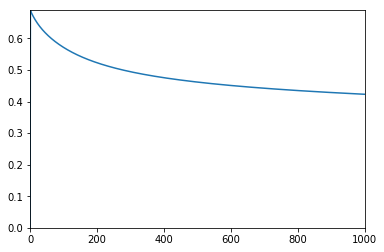

In [12]:
#Graficke znazornenie ucenia siete
plt.plot(range(len(loss_history)),loss_history)
plt.axis([0,training_epochs,0,np.max(loss_history)])
plt.show()